In [1]:
#numeric: pandas and numpy
import numpy as np
import pandas as pd
# graphics
%matplotlib inline 

import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import seaborn as sns

from sklearn import linear_model, svm, preprocessing, tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report, f1_score
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv('data/sensoringData_feature_prepared_20_19.0_2.csv',header = 0)

# id is useless
df.drop('id',axis=1,inplace=True)
df.drop('user',axis=1,inplace=True)
df.drop('timestamp',axis=1,inplace=True)

feature_list = list(df.columns[:-2])
print(len(feature_list))
#print(df.head())

# print the number of missing 
#df.isnull().sum()

90


In [3]:
print(df['activity'].unique())

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
#df['activity']= label_encoder.fit_transform(df['activity'])
 
print(df['activity'].unique())

y=df.values[:,-1]
#Y = np.array(y).astype(int)
#print(y)

X=df.values[:,0:-2]
print(f"Features: {len(X[0])}")
print(f"Examples: {len(X)}")

['Walking' 'Inactive' 'Active' 'Driving']
['Walking' 'Inactive' 'Active' 'Driving']
Features: 90
Examples: 499276


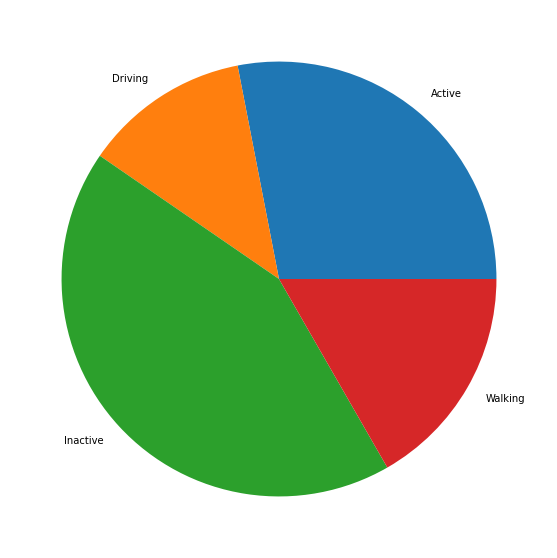

In [4]:
labels = np.unique(y)
#print(labels)
quantity = [np.sum(y == label) for label in labels]
#print(quantity)
#print(sum(quantity))

# Creating plot 
fig = plt.figure(figsize =(20, 10)) 
plt.pie(quantity, labels=labels) 
  
# show plot 
plt.show()

In [5]:
# Separating the data 
dfW=df[df['activity'] == "Walking"]
dfA=df[df['activity'] == "Active"]
dfI=df[df['activity'] == "Inactive"]
dfD=df[df['activity'] == "Driving"]
"""
#Creating the window with 10 subplots.
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(7,10))
axes = axes.ravel()
#Creating histograms with 50 bins
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[feature_list[idx]]) - min(df[feature_list[idx]]))/40
    ax.hist([dfW[feature_list[idx]],dfI[feature_list[idx]],dfA[feature_list[idx]],dfD[feature_list[idx]]], bins=np.arange(min(df[feature_list[idx]]), max(df[feature_list[idx]]) + binwidth, binwidth) , alpha=0.8,stacked=True, density= True, label=['W','I','A','D'],color=['b','g','orange','r'])
    ax.legend(loc='upper right')
    ax.set_title(feature_list[idx])
plt.tight_layout()
plt.show()"""

"\n#Creating the window with 10 subplots.\nplt.rcParams.update({'font.size': 8})\nfig, axes = plt.subplots(nrows=4, ncols=3, figsize=(7,10))\naxes = axes.ravel()\n#Creating histograms with 50 bins\nfor idx,ax in enumerate(axes):\n    ax.figure\n    binwidth= (max(df[feature_list[idx]]) - min(df[feature_list[idx]]))/40\n    ax.hist([dfW[feature_list[idx]],dfI[feature_list[idx]],dfA[feature_list[idx]],dfD[feature_list[idx]]], bins=np.arange(min(df[feature_list[idx]]), max(df[feature_list[idx]]) + binwidth, binwidth) , alpha=0.8,stacked=True, density= True, label=['W','I','A','D'],color=['b','g','orange','r'])\n    ax.legend(loc='upper right')\n    ax.set_title(feature_list[idx])\nplt.tight_layout()\nplt.show()"

In [6]:
# Anova selection

def get_best_x_features(X, y, num_features=50):
    #df = (df - np.min(df))/(np.max(df) - np.min(df))
    
    k_bestfeatures = SelectKBest(score_func = f_classif, k=num_features)
    k_bestfeatures.fit(X, y)
    
    # what are scores for the features
    #for i in range(len(rankings.scores_)):
        #print('Feature %d: %f' % (i, rankings.scores_[i]))
    
    # transform train input data
    X_best = k_bestfeatures.transform(X)
    return X_best
        

In [7]:
X_best = get_best_x_features(X,y,10)
print(f"Features: {len(X_best[0])}")
print(f"Examples: {len(X_best)}")

Features: 10
Examples: 499276


## Train_test_split

#### Extract X and y train in order to evaluate the models

In [9]:
X_temp, X_test, y_temp, y_test = train_test_split(X_best, y, test_size=0.5,random_state=109) # 50% training and 50% test
print("Examples to train: {}".format(len(X_temp)))

Examples to train: 249638


# Models Evaluation

#### Large Dataset - Holdout method, not Cross validation
#### We use the f-score metric to evaluate de model because our dataset is unbalanced, so accuracy is not recommended.

In [12]:
# Split train dataset - Train and Validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.4,random_state=109) # 60% training and 40% validation
print("Examples to train: {}".format(len(X_train)))

Examples to train: 149782


### Models Functions

In [18]:
#Create a linear svm Classifier
def linear_svm(c):
    l_svm = svm.SVC(kernel="linear", C=c)
    l_svm.fit(X_train, y_train)
    y_pred = l_svm.predict(X_valid)
    f1 = f1_score(y_valid, y_pred, average='micro')
    
    return f1
    
    #return run_kFold(l_svm, X_train, y_train)

In [19]:
#Create a RBF svm Classifier
def rbf_svm(c):
    rbf_svm = svm.SVC(C=c,kernel='rbf')
    rbf_svm.fit(X_train, y_train)
    y_pred = rbf_svm.predict(X_valid)
    f1 = f1_score(y_valid, y_pred, average='micro')
    
    return f1

    #return run_kFold(rbf_svm, X_train, y_train)

In [20]:
# Logistic regression - not used
def lr(X_train, y_train):
    regr = linear_model.LogisticRegression()
    
    return run_kFold(regr, X_train, y_train)

In [21]:
# K-Nearest Neighbors
def knn(n_neigh, metric='euclidean'):
    k_n_n = KNeighborsClassifier(n_neighbors=n_neigh, metric=metric)
    k_n_n.fit(X_train, y_train)
    y_pred = k_n_n.predict(X_valid)
    f1 = f1_score(y_valid, y_pred, average='micro')
    
    return f1

    #return run_kFold(k_n_n, X_train, y_train)

In [24]:
# Decision Tree
def dtree(criterion, max_depth):
    clf = tree.DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    f1 = f1_score(y_valid, y_pred, average='micro')
    
    return f1
    #return run_kFold(clf, X_train, y_train)

In [23]:
# Random Forest
def rf(n_estimators, max_depth):
    #Create a Gaussian Classifier
    r_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    r_forest.fit(X_train, y_train)
    y_pred = r_forest.predict(X_valid)
    f1 = f1_score(y_valid, y_pred, average='micro')
    
    return f1

    #return run_kFold(r_forest, X_train, y_train)

## Training the models with different hyper-parameters

### Decision Tree

In [16]:
# Define our candidate hyperparameters
hp_candidates_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [2,4,8,15,20,25]}

best_hp_dt = {'f1':0, 'candidates': (' ',0)}
for cri in hp_candidates_dt['criterion']:
    for max_ in hp_candidates_dt['max_depth']:
        dt_f1 = dtree(cri, max_)
        print(dt_f1)
        if dt_f1 > best_hp_dt['f1']:
            candidates = (cri, max_)
            best_hp_dt['f1'] = dt_f1
            best_hp_dt['candidates'] = candidates
            
print("Best: ",best_hp_dt)

0.7864825348501843
0.908097660631309
0.9276458099663516
0.9450909309405544
0.9504386316295466
0.9506188912033328
0.790017625380548
0.9096098381669604
0.9274355071302676
0.9457418682903381
0.950388559525717
0.9494171607114245
Best:  {'f1': 0.9506188912033328, 'candidates': ('gini', 25)}


### Random Forest

In [25]:
# Define our candidate hyperparameters
hp_candidates_rf = {'n_estimators': [10, 50, 100, 200], 'max_depth': [3,10,80, 90, 110]}

best_hp_rf = {'f1':0, 'candidates': (0,0)}
for est in hp_candidates_rf['n_estimators']:
    for max_ in hp_candidates_rf['max_depth']:
        rf_f1 = rf(est, max_)
        print(rf_f1, est,max_)
        if rf_f1 > best_hp_rf['f1']:
            candidates = (est, max_)
            best_hp_rf['f1'] = rf_f1
            best_hp_rf['candidates'] = candidates
            
print("Best: ",best_hp_rf)

0.908528280724243 10 3
0.9384513699727608 10 10
0.962155503925653 10 80
0.962145489504887 10 90
0.9618751001442076 10 110
0.9090890882871333 50 3
0.938321182502804 50 10
0.9655604069860599 50 80
0.9661212145489505 50 90
0.9655303637237622 50 110
0.909239304598622 100 3
0.9385615286011857 100 10
0.9662413875981414 100 80
0.9661312289697164 100 90
0.9660511136035892 100 110
0.9098301554238103 200 3
0.9387718314372697 200 10
0.9664917481172889 200 80
0.9662514020189072 200 90
0.966281445281205 200 110
Best:  {'f1': 0.9664917481172889, 'candidates': (200, 80)}


### K-Nearest Neighbors

In [75]:
# Define our candidate hyperparameters
hp_candidates_knn = {'n_neighbors': [3,7], 'metrics': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}

best_hp_knn = {'f1':0, 'candidates': (3,' ')}
for nei in hp_candidates_knn['n_neighbors']:
    for met in hp_candidates_knn['metrics']:
        knn_f1 = knn(nei, met)
        if knn_f1 > best_hp_knn['f1']:
            candidates = (nei, met)
            best_hp_knn['f1'] = knn_f1
            best_hp_knn['candidates'] = candidates
            
print("Best: ",best_hp_knn)

Best:  {'f1': 0.9497871779732483, 'candidates': (3, 'manhattan')}


### Linear SVM 

In [18]:
# Define our candidate hyperparameters
hp_candidates_linear = {'C': [0.1, 0.3, 1, 3]}

best_hp_linear = {'f1':0, 'C': 0.01}
for c in hp_candidates_linear['C']:
    svm_linear_f1 = linear_svm(c)
    print(svm_linear_f1)
    if svm_linear_f1 > best_hp_linear['f1']:
        best_hp_linear['f1'] = svm_linear_f1
        best_hp_linear['C'] = c
            
print("Best: ",best_hp_linear)

1 Done!
1 Done!
1 Done!
1 Done!
0.818947458437815
1 Done!
1 Done!
1 Done!
1 Done!
0.8323368762021597
1 Done!
1 Done!
1 Done!
1 Done!
0.8426718659462824
1 Done!
1 Done!
1 Done!
1 Done!
0.8487106306694587
1 Done!
1 Done!
1 Done!
1 Done!
0.8534274729965194
1 Done!
1 Done!
1 Done!
1 Done!
0.8564718894041695
Best:  {'f1': 0.8564718894041695, 'C': 3}


### RBF SVM

In [ ]:
# Define our candidate hyperparameters
hp_candidates_rbf = {'C': [0.1, 0.3, 1, 3]}

best_hp_rbf = {'f1':0, 'C': 0.01}
for c in hp_candidates_rbf['C']:
    svm_rbf_f1 = rbf_svm(c)
    print(svm_rbf_f1)
    if svm_rbf_f1 > best_hp_rbf['f1']:
        best_hp_rbf['f1'] = svm_rbf_f1
        best_hp_rbf['C'] = c
            
print("Best: ",best_hp_rbf)

# Final models comparison

#### Create the model with best hyperparameters.
#### Trainning set now is trainning + validation (temp set)

In [48]:
def printConfMatrix(cf_matrix,model):
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Confusion Matrix - '+model);
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Active', 'Driving', 'Inactive', 'Walking'])
    ax.yaxis.set_ticklabels(['Active', 'Driving', 'Inactive', 'Walking'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [55]:
f1_results = {}
labels_results = {0:[], 1:[], 2:[], 3: []}  # 0:'Active', 1:'Driving', 2:'Inactive', 3:'Walking'

In [46]:
#Decision Tree
final_dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=25)
final_dt.fit(X_temp, y_temp)
print("Model created!")
y_pred = final_dt.predict(X_test)
print("Prediction done!")

cm_dt = confusion_matrix(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred, average=None)
for i in range(len(labels_results)):
    labels_results[i].append(f1_dt[i])

f1_results["dt"] = f1_dt
print("F1 Score: ",f1_dt)
print(labels_results)

Model created!
Prediction done!
              precision    recall  f1-score   support

      Active       0.93      0.96      0.94     70162
     Driving       0.97      0.95      0.96     30721
    Inactive       0.98      0.98      0.98    107112
     Walking       0.94      0.90      0.92     41643

    accuracy                           0.96    249638
   macro avg       0.95      0.95      0.95    249638
weighted avg       0.96      0.96      0.96    249638

F1 Score:  [0.94148899 0.96201326 0.98309424 0.91696583]


In [45]:
#Random Forest
final_r_forest = RandomForestClassifier(n_estimators=200, max_depth=80)
final_r_forest.fit(X_temp, y_temp)
print("Model created!")
y_pred = final_r_forest.predict(X_test)
print("Prediction done!")

cm_rf = confusion_matrix(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred, average=None)
for i in range(len(labels_results)):
    labels_results[i].append(f1_rf[i])

f1_results["rf"] = f1_rf
print("F1 Score: ",f1_rf)

Model created!
Prediction done!
F1 Score:  [0.96270909 0.9760291  0.98921724 0.94571999]


In [16]:
#KNN
final_knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
final_knn.fit(X_temp, y_temp)
print("Model created!")
y_pred = final_knn.predict(X_test)
print("Prediction done!")
cm_knn = confusion_matrix(y_test, y_pred)

f1_knn = f1_score(y_test, y_pred, average=None)
for i in range(len(labels_results)):
    labels_results[i].append(f1_knn[i])
    
f1_results["knn"] = f1_knn
print("F1 Score: ",f1_knn)

Fitted!
399421
[[107169   1028   1277   2579]
 [  2244  46474    186    300]
 [  2190    102 168432    575]
 [  5022    312   2552  58979]]


In [ ]:
#RBF SVM
final_svm = svm.SVC(C=3,kernel='rbf')
final_svm.fit(X_temp, y_temp)
print("Model created!")
y_pred = final_svm.predict(X_test)
print("Prediction done!")

cm_svm = confusion_matrix(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred, average=None)
for i in range(len(labels_results)):
    labels_results[i].append(f1_svm[i])
    
f1_results["svm"] = f1_svm
print("F1 Score: ",f1_svm)

Fitted!


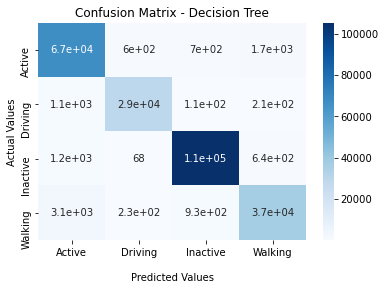

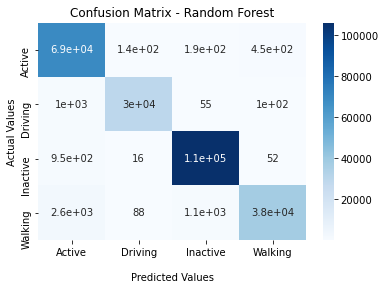

NameError: name 'cm_knn' is not defined

In [50]:
# Confusion Matrixes
printConfMatrix(cm_dt, "Decision Tree")
printConfMatrix(cm_rf, "Random Forest")
printConfMatrix(cm_knn, "KNN")
printConfMatrix(cm_svm, "RBF SVM")

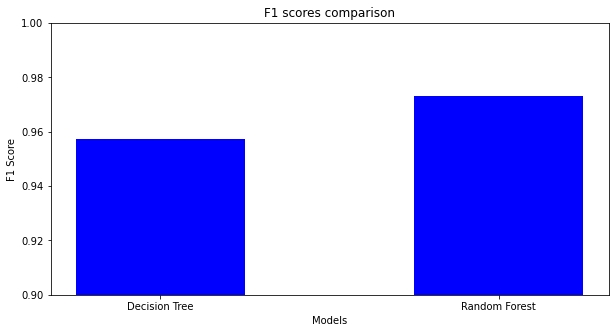

In [40]:
# Compare f1 scores - avg = "micro"
values = [f1_dt, f1_rf]
models = ["Decision Tree", "Random Forest"]

fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(models, values, color ='blue',
        width = 0.5)
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.title("F1 scores comparison")
plt.ylim(0.9,1)
plt.show()

Text(0, 0.5, 'F1 Score')

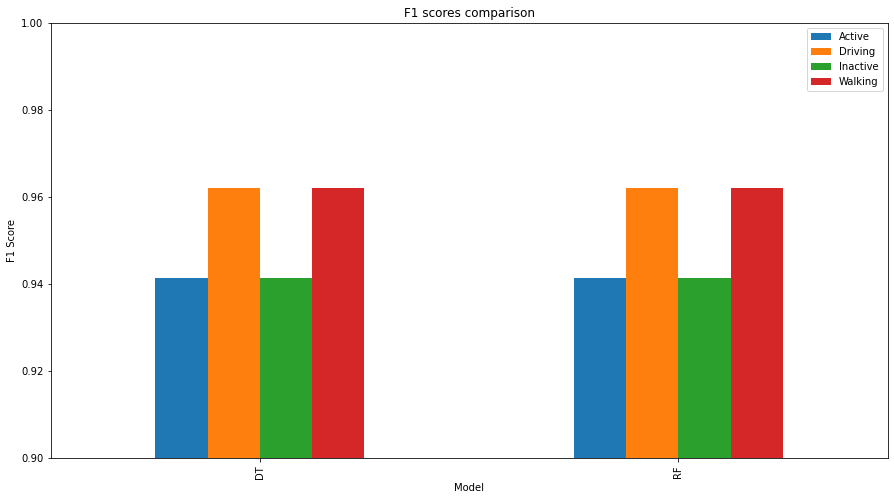

In [61]:
# Compare f1 scores - avg = None

plotdata = pd.DataFrame({

    "Active":labels_results[0],

    "Driving":labels_results[1],
    
    "Inactive":labels_results[2],

    "Walking":labels_results[3]},

    index=["DT", "RF", "KNN", "SVM"])

plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("F1 scores comparison")

plt.xlabel("Model")
plt.ylim(0.9,1)
plt.ylabel("F1 Score")